In [146]:
import pandas as pd

training_df = pd.read_csv("datasets/train.csv")
testing_df = pd.read_csv("datasets/test.csv")

training_df.set_index("PassengerId", inplace=True)
training_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
# finding what percentage of females survived
women = training_df[training_df.Sex == 'female']
survived = women['Survived']
rate_women = sum(survived)/len(women)
rate_women

0.7420382165605095

In [105]:
# finding what percentage of males survived
men = training_df.loc[training_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


From this you can see that almost 75% of the women on board survived, whereas only 19% of the men lived to tell about it. Since gender seems to be such a strong indicator of survival, this method of predicting is not a bad first guess, and it makes sense that it performed reasonably well!

But at the end of the day, this gender-based submission bases its predictions on only a single column. As you can imagine, by considering multiple columns, we can discover more complex patterns that can potentially yield better-informed predictions. Since it is quite difficult to consider several columns at once (or, it would take a long time to consider all possible patterns in many different columns simultaneously), we'll use machine learning models to automate this for us.

In [106]:
# first let's assemble our X and y data columns
features = ["Sex", "Pclass", "SibSp", "Parch"]
# get_dummies() converts all categorical values (ie male/female) to integer representations.
# note that we now have 2 new columns: sex_female and sex_male 
X = pd.get_dummies(training_df[features])
y = training_df['Survived']
X

,Pclass,SibSp,Parch,Sex_female,Sex_male
PassengerId,,,,,
1,3,1,0,0,1
2,1,1,0,1,0
3,3,0,0,1,0
4,1,1,0,1,0
5,3,0,0,0,1
...,...,...,...,...,...
887,2,0,0,0,1
888,1,0,0,1,0
889,3,1,2,1,0


The above method *get_dummies()* returns a Dummy-coded data.
**Dummy coding** is used when categorical variables (e.g., sex, geographic location, ethnicity) are of interest in prediction. It provides one way of using categorical predictor variables in various kinds of estimation models, such as linear regression. Dummy coding uses only 1s and 0s to convey all the necessary information on group membership. With this kind of coding, the researcher enters a 1 to indicate that a person is a member of a category, and a 0 otherwise.

Dummy codes are a series of numbers assigned to indicate group membership in any mutually exclusive and exhaustive category. Category membership is indicated in one or more columns of 0s and 1s. For example, a researcher could code sex as 1 = female, 0 = male 

#### Using KNN

First, we split our training dataset into training and testing sets using k-fold cross validation. And then apply KNN to find the model accuracy.

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# store the predicted response values
# output = pd.DataFrame({'PassengerId': testing_df.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")


Text(0, 0.5, 'Cross-Validated Accuracy')

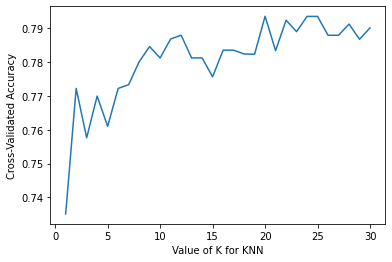

In [128]:
# Let's plot the graph
import matplotlib.pyplot as plt

# to better visualize this k_scores array, we plot the graph
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


The highest accuracy we got was 0.7935 when k was 19.

In [139]:
print(f"k = {k_scores.index(max(k_scores))}")
print(max(k_scores))

k = 19
0.7935330836454433


#### Using random forest
Read this article to know more about tuning the parameters: 
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 

In [143]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

scores.mean()

0.7912858926342072

Now, let's upload the dataset in kaggle and see what we get.

In [153]:
X_test = pd.get_dummies(testing_df[features])

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': testing_df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


So, after submitting, I got a score of 0.77511.
I'll try to increase this score as I get older. xD